## Contents

### Defining Cluster Range - Elbow Analysis

### Cluster Analysis

### Cluster Scatterplotting

## 6.5 Machine Learning Clusters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# Making Path do data as a string
path = r'C:\Users\bbissonette\Documents\Data Analytics Course\Acheivement 6'

In [4]:
# Importing Fluid_Lab_Invoicing_Raw data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'listings_clean.csv'), index_col = False)

In [5]:
df.shape

(19988, 22)

In [6]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,host_total_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating
0,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,1,44,1.0,Apartment,2,1.5,1.0,2.0,1,97.0
1,1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,...,1,47,1.0,Apartment,5,1.0,2.0,2.0,2,96.0
2,2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,...,2,198,2.0,Townhouse,2,1.0,1.0,1.0,2,87.0
3,3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,...,2,141,2.0,Apartment,3,1.0,1.0,1.0,2,100.0
4,4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,...,1,199,1.0,Houseboat,2,1.0,1.0,1.0,1,99.0


In [7]:
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
sub = df [['id','host_id','latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included']]

In [9]:
sub.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included
0,2818,3159,52.365755,4.941419,59,3,248,1,44,1.0,2,1.5,1.0,2.0,1
1,3209,3806,52.390225,4.873924,160,4,42,1,47,1.0,5,1.0,2.0,2.0,2
2,20168,59484,52.365087,4.893541,80,1,233,2,198,2.0,2,1.0,1.0,1.0,2
3,25428,56142,52.373114,4.883668,125,14,1,2,141,2.0,3,1.0,1.0,1.0,2
4,27886,97647,52.386727,4.892078,150,2,171,1,199,1.0,2,1.0,1.0,1.0,1


In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\bbissonette\Desktop\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bbissonette\Desktop\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bbissonette\Desktop\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bbissonette\Desktop\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

[-6.5353754880945594e+19,
 -1.6456374323270173e+19,
 -7.819885833525711e+18,
 -4.705199414325821e+18,
 -3.288857039963232e+18,
 -2.683672464881513e+18,
 -2.117861071147307e+18,
 -1.765737025188011e+18,
 -1.4987825873817713e+18]

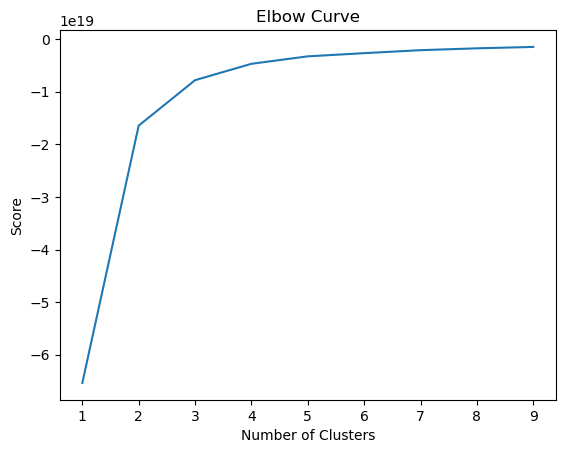

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The Elbow curve jumps from 2-3 and straightens out slowly after so the optimal number of clusters is 3

In [13]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\bbissonette\Desktop\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [16]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\bbissonette\Desktop\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bbissonette\AppData\Local\Temp\ipykernel_37972\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [17]:
sub.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,clusters
0,2818,3159,52.365755,4.941419,59,3,248,1,44,1.0,2,1.5,1.0,2.0,1,0
1,3209,3806,52.390225,4.873924,160,4,42,1,47,1.0,5,1.0,2.0,2.0,2,0
2,20168,59484,52.365087,4.893541,80,1,233,2,198,2.0,2,1.0,1.0,1.0,2,0
3,25428,56142,52.373114,4.883668,125,14,1,2,141,2.0,3,1.0,1.0,1.0,2,0
4,27886,97647,52.386727,4.892078,150,2,171,1,199,1.0,2,1.0,1.0,1.0,1,0


In [18]:
sub['clusters'].value_counts()

0    12897
2     4465
1     2626
Name: clusters, dtype: int64

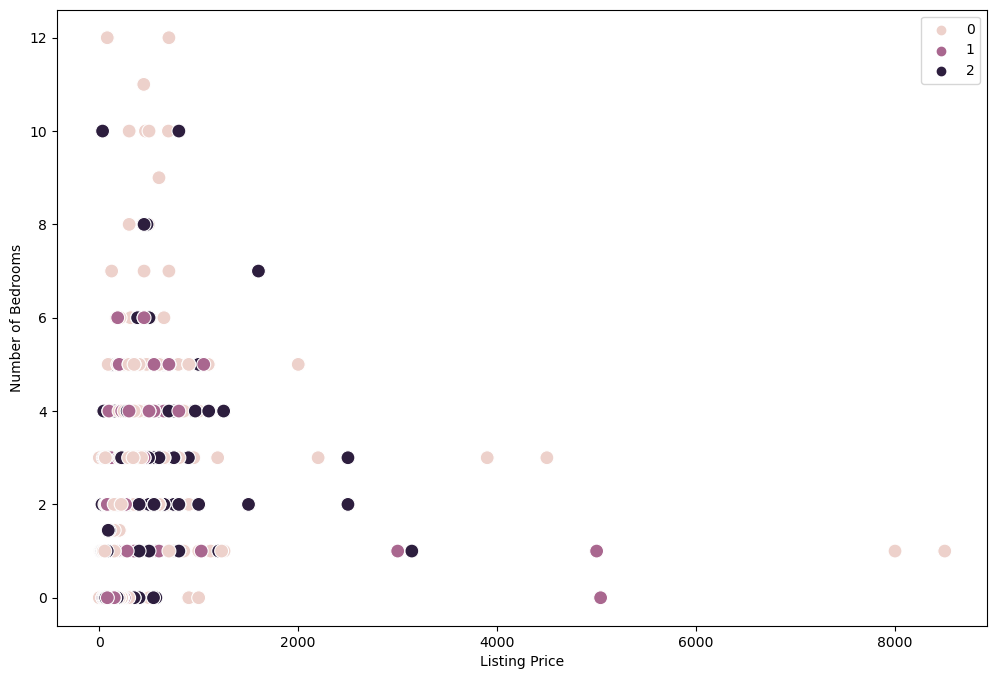

In [21]:
# Plotting the clusters for the "Price" and "Bedrooms" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['bedrooms'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Listing Price') 
plt.ylabel('Number of Bedrooms') 
plt.show()

Hard to see here any delineation between the clusters and how price and the number of bedrooms per listing are.

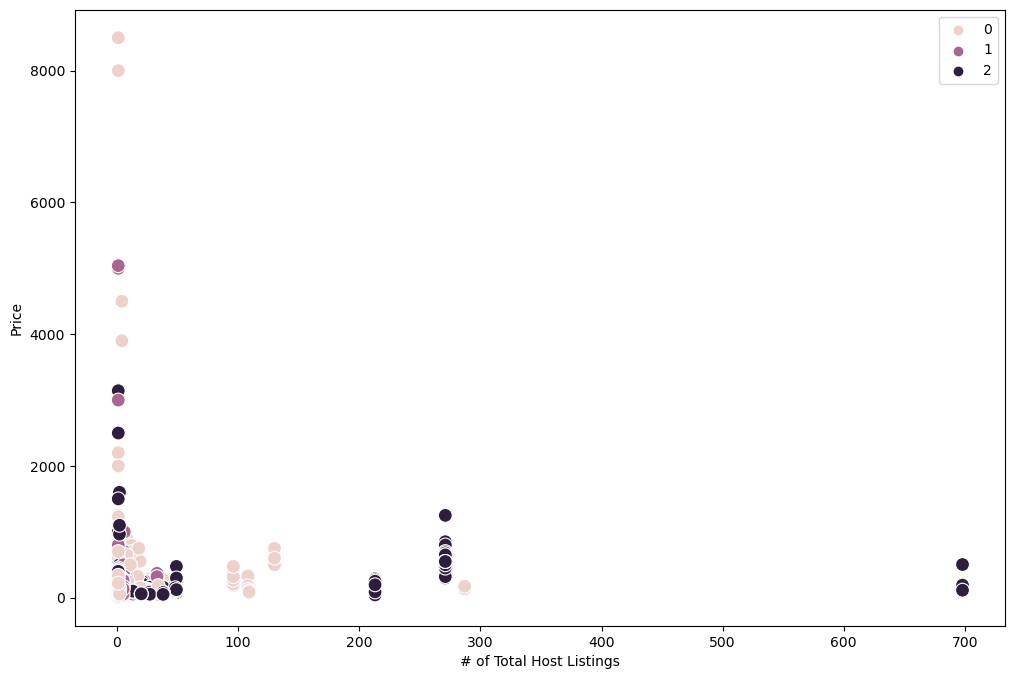

In [29]:
# Plotting the clusters for the "Price" and "Bedrooms" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['host_total_listings_count'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('# of Total Host Listings') 
plt.ylabel('Price') 
plt.show()

Here there seems to be a little better separation fo the clusters regarding how the total number of listing per host reflects the price of the listings. 

In [33]:
# Creating statistical descriptive statistics on the clusters.
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\bbissonette\AppData\Local\Temp\ipykernel_37972\942111511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [49]:
sub.groupby('cluster').agg({'price':['mean', 'median'], 
                         'minimum_nights':['mean', 'median'], 
                         'availability_365':['mean', 'median'],
                          'accommodates':['mean', 'median'],
                          'guests_included':['mean', 'median']})

price        minimum_nights        availability_365         \
                   mean median           mean median             mean median   
cluster                                                                        
dark purple  151.703919  125.0       3.152968    2.0        54.938410    0.0   
pink         151.358533  125.0       3.499186    2.0        59.198031    3.0   
purple       157.547982  134.0       2.795887    2.0        72.589109   14.0   

            accommodates        guests_included         
                    mean median            mean median  
cluster                                                 
dark purple     2.906159    2.0        1.390370    1.0  
pink            2.881988    2.0        1.520043    1.0  
purple          2.923839    2.0        1.356055    1.0

Dark purple, pink, and purple all show close relativity to another in different categories, but one will always jump away from the other two in mean. Hard to draw many conclusions from this as there is not a significant trend.

Seeing that custer 2 and 3 are similar here i will rerun the cluster system with 2 clusters instead of 3 to see if that create better delineation between clusters.

In [37]:
sub_2 = df [['id','host_id','latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included']]

In [35]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 2) 

In [38]:
# Fit the k-means object to the data.

kmeans.fit(sub_2)

C:\Users\bbissonette\Desktop\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [42]:
sub_2['clusters'] = kmeans.fit_predict(sub_2)

C:\Users\bbissonette\Desktop\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bbissonette\AppData\Local\Temp\ipykernel_37972\1650385897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_2['clusters'] = kmeans.fit_predict(sub_2)


In [43]:
sub_2.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,clusters
0,2818,3159,52.365755,4.941419,59,3,248,1,44,1.0,2,1.5,1.0,2.0,1,0
1,3209,3806,52.390225,4.873924,160,4,42,1,47,1.0,5,1.0,2.0,2.0,2,0
2,20168,59484,52.365087,4.893541,80,1,233,2,198,2.0,2,1.0,1.0,1.0,2,0
3,25428,56142,52.373114,4.883668,125,14,1,2,141,2.0,3,1.0,1.0,1.0,2,0
4,27886,97647,52.386727,4.892078,150,2,171,1,199,1.0,2,1.0,1.0,1.0,1,0


In [44]:
sub_2['clusters'].value_counts()

0    16185
1     3803
Name: clusters, dtype: int64

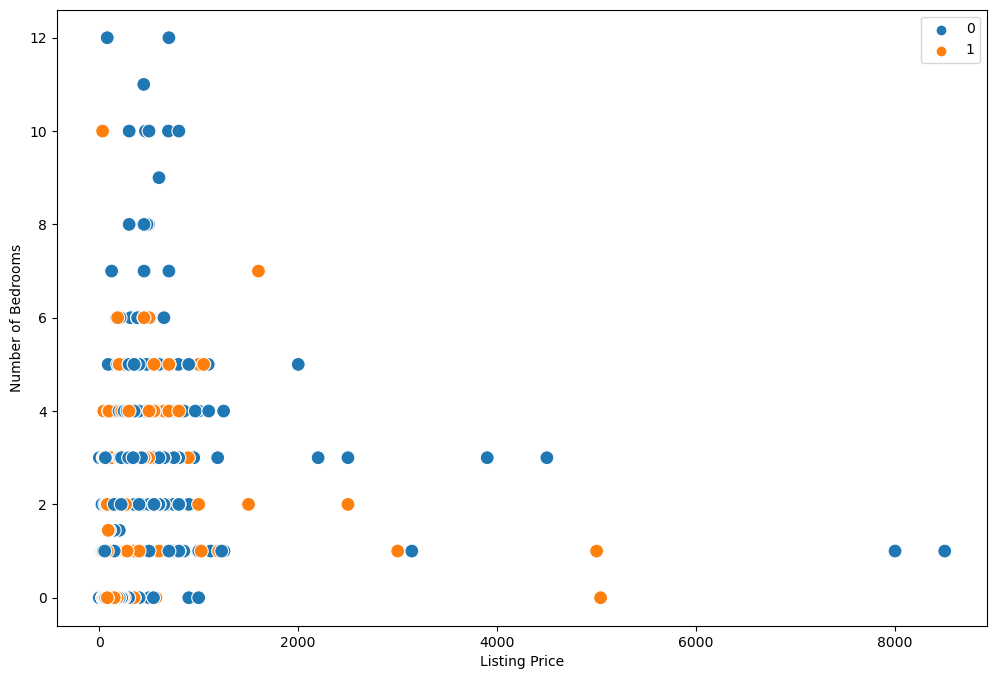

In [45]:
# Plotting the clusters for the "Price" and "Bedrooms" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['bedrooms'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Listing Price') 
plt.ylabel('Number of Bedrooms') 
plt.show()

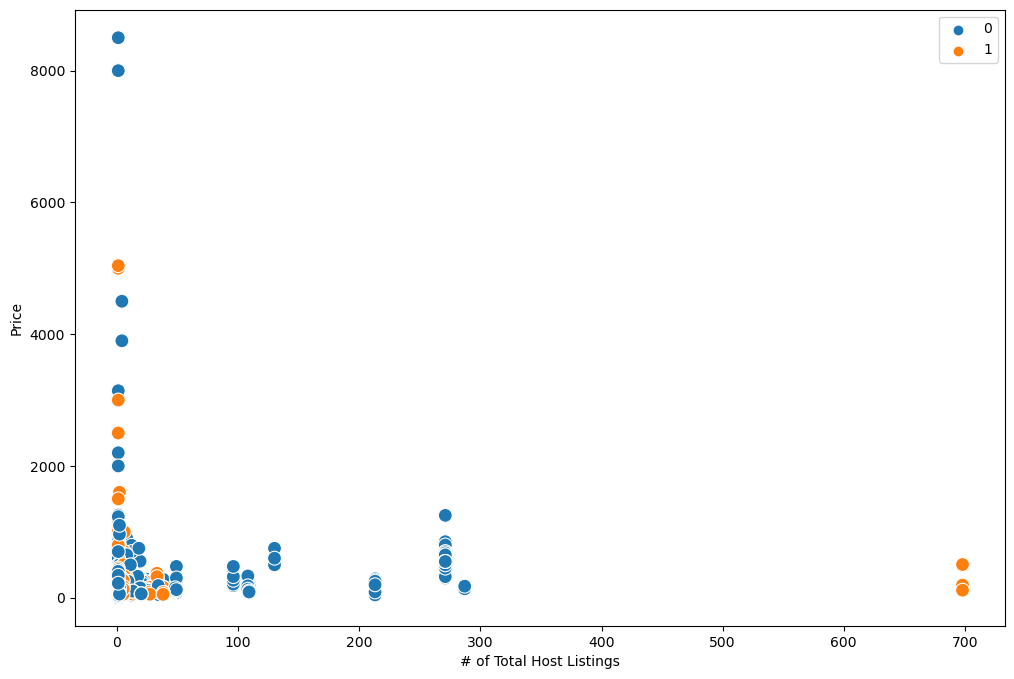

In [46]:
# Plotting the clusters for the "Price" and "Bedrooms" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['host_total_listings_count'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('# of Total Host Listings') 
plt.ylabel('Price') 
plt.show()

In [47]:
sub_2.loc[sub_2['clusters'] == 1, 'cluster'] = 'purple'
sub_2.loc[sub_2['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\bbissonette\AppData\Local\Temp\ipykernel_37972\905357969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_2.loc[sub_2['clusters'] == 1, 'cluster'] = 'purple'


In [48]:
sub_2.groupby('cluster').agg({'price':['mean', 'median'], 
                         'minimum_nights':['mean', 'median'], 
                         'availability_365':['mean', 'median'],
                          'accommodates':['mean', 'median'],
                          'guests_included':['mean', 'median']})

price        minimum_nights        availability_365         \
               mean median           mean median             mean median   
cluster                                                                    
pink     151.478962  125.0       3.425023    2.0        58.225703    2.0   
purple   155.525375  130.0       2.922693    2.0        67.581646   10.0   

        accommodates        guests_included         
                mean median            mean median  
cluster                                             
pink        2.887303    2.0        1.490083    1.0  
purple      2.916645    2.0        1.382067    1.0

After runnigng this with 2 clusters the delineation still is not strong and im not sure why. I guess this means greater diving into the data.

These results could be usefull in determine certain behaviours between some of the variables and how they might be grouped and related into different subsets of categories by crossing and combining the categorical data related to the continuous data. The delineation may appear better with understanding the relationship between room_type and property_type crossed this the data in tableau.